In [1]:
from loss import AdversarialLoss

In [2]:
from train import train
from visualize import plot_model, plot_models, plot_stats, plot_hist
from distributions import *

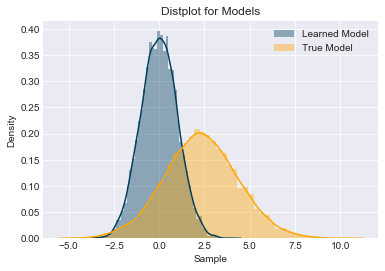

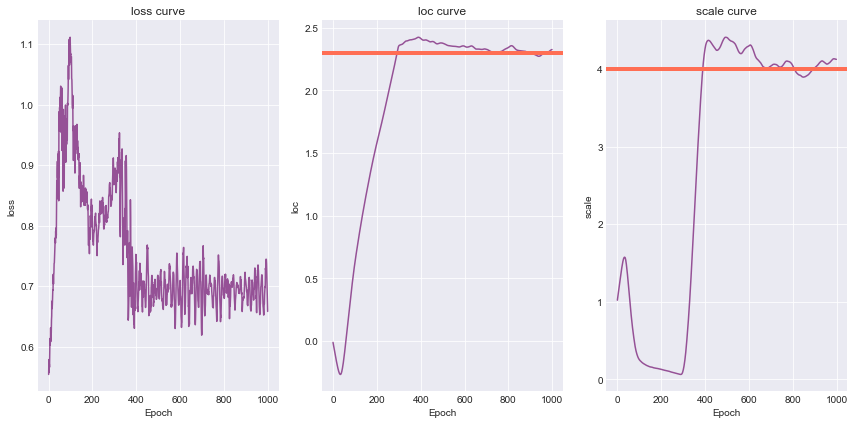

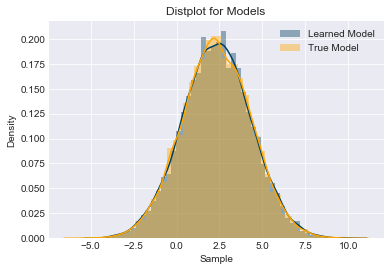

In [3]:
q_model = Normal([0.0],[[1.0]])
p_model = Normal([2.3], [[4.0]])

plot_models(p_model, q_model)
stats = train(p_model, q_model, AdversarialLoss)
plot_stats(stats, goals=[p_model.loc.item(), p_model.scale.item()])
plot_models(p_model, q_model)